# Purpose
研究婚外情的數據

(1) 該位外遇的可能性有多大？ 
(2) 影響外遇的原因是什麼？ 
(3) 可以根據分析結果說明如何降低外遇的發生嗎？

# 數據說明

* 婚外情數據即著名的“Fair’s Affairs”，取自於1969年《今日心理》（Psychology Today）所做的一個代表性調查
* 該數據從601個參與者身上收集了9個變量
* 變數包括一年來婚外情的頻率以及參與者性別、年齡、婚齡、是否有小孩、宗教信仰程度、學歷、職業，還有對婚姻的自我評分

#### affairs 受訪者在過去一年中進行外遇的頻率         
0 = 無         
1 = 一次       
2 = 兩次         
3 = 三次        
7 = 4 - 10 次         
12 = 每月或更多         

#### gender          
0 = 女性         
1 = 男性         

#### age         
17.5 = 20 歲以下         
22.0 = 20 - 24         
27.0 = 25 - 29         
32.0 = 30 - 34         
37.0 = 35 - 39         
42.0 = 40 - 44         
47.0 = 45 - 49         
52.0 = 50 - 54         
57.0 = 55 或以上         

#### yearsmarried  婚姻時間                  
0.125 = 3 個月或更短         
0.417 = 4 - 6 個月         
0.750 = 6 個月 - 1 年         
1.500 = 1 - 2 年         
4.000 = 3 - 5 年         
7.000 = 6 - 8 年         
10.00 = 9 - 11 年         
15.00 = 12 年或更長時間         

#### children 孩子人數                  
0 = 無         
1 = 一個或多個         
         
#### religiousness 婚內的宗教信仰         
1 = 反宗教         
2 = 完全沒有         
3 = 輕微         
4 = 有點         
5 = 非常         

#### education 教育程度         
9.0 = 小學         
12.0 = 高中畢業         
14.0 = 一些大學         
16.0 = 大學畢業生         
17.0 = 一些畢業作品         
18.0 = 碩士學位         
20.0 = 博士、醫學博士或其他高級學位 

#### occupation 詳見data-descriptions.pdf

#### rating 對婚姻的自我評分 (5分制，1表示非常不幸福，5表示非常幸福）         

# 1. import data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [2]:
df = pd.read_csv('Affairs.csv')
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


### <span style="color:#3498DB">Point: 請先將affairs變數轉為二值型因子'ynaffair'，外遇0次為0，外遇一次以上為1</span>

In [3]:
new=df['affairs'] > 0
df['yaffairs'] = new.astype(int)




In [4]:
df.describe()

,affairs,age,yearsmarried,religiousness,education,occupation,rating,yaffairs
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780,0.249584
std,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179,0.433133
min,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,1.000000


In [5]:
df.isnull().sum()

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
yaffairs         0
dtype: int64

In [6]:
#Standard libraries for data analysis:  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import seaborn as sns # For creating plots
sns.set_style('darkgrid')

In [7]:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

In [9]:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()

import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

In [10]:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [11]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

affair_pct = df.groupby('children')['yaffairs'].value_counts(normalize=True).unstack() * 100
print(affair_pct)

yaffairs          0          1
children                      
no        84.210526  15.789474
yes       71.395349  28.604651


In [12]:

affair_pct = df.groupby('gender')['yaffairs'].value_counts(normalize=True).unstack() * 100
print(affair_pct)

yaffairs          0          1
gender                        
female    77.142857  22.857143
male      72.727273  27.272727


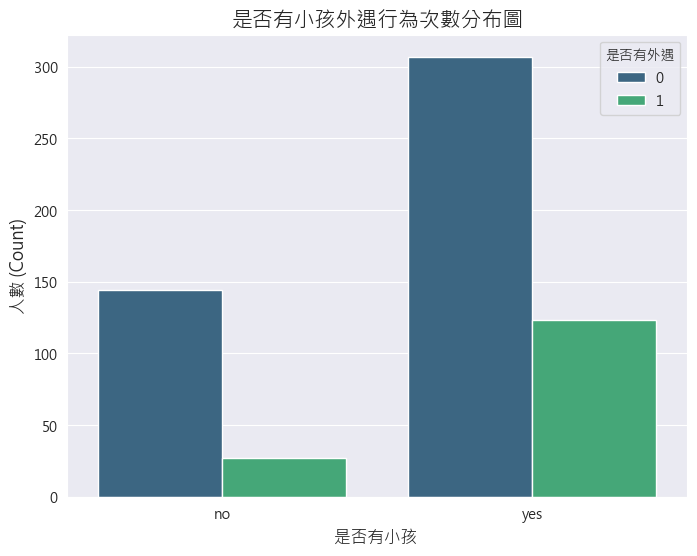

In [13]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修正中文亂碼問題

# 建立圖表
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='children', hue='yaffairs', palette='viridis')

# 加上標題與標籤
plt.title('是否有小孩外遇行為次數分布圖', fontsize=15)
plt.xlabel('是否有小孩 ', fontsize=12)
plt.ylabel('人數 (Count)', fontsize=12)
plt.legend(title='是否有外遇')

plt.show()

In [14]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

affair_pct = df.groupby('gender')['yaffairs'].value_counts(normalize=True).unstack() * 100
print(affair_pct)

yaffairs          0          1
gender                        
female    77.142857  22.857143
male      72.727273  27.272727


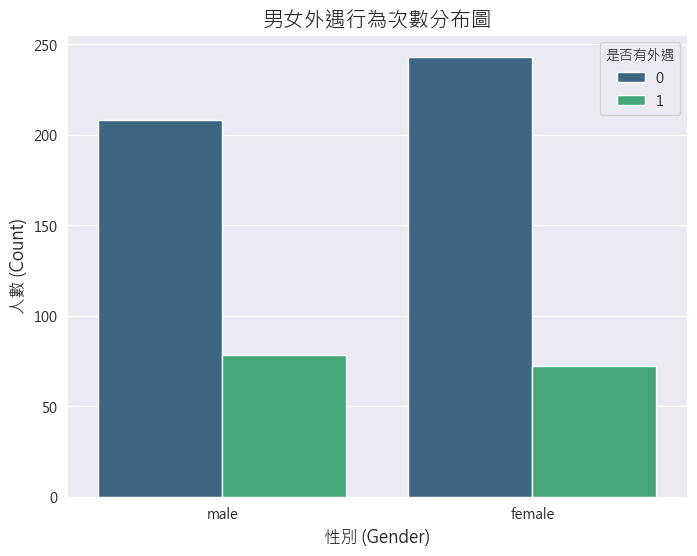

In [15]:
# sns.set(style="whitegrid", font_as_parent=True)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修正中文亂碼問題

# 建立圖表
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='yaffairs', palette='viridis')

# 加上標題與標籤
plt.title('男女外遇行為次數分布圖', fontsize=15)
plt.xlabel('性別 (Gender)', fontsize=12)
plt.ylabel('人數 (Count)', fontsize=12)
plt.legend(title='是否有外遇')

plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. 計算各個婚姻分數 (Rating) 的外遇比例
rating_affair = df.groupby('rating')['yaffairs'].mean().reset_index()
rating_affair['yaffairs'] *= 100  # 轉為百分比

# 3. 計算各個職業 (Occupation) 的外遇比例
occ_affair = df.groupby('occupation')['yaffairs'].mean().reset_index()
occ_affair['yaffairs'] *= 100

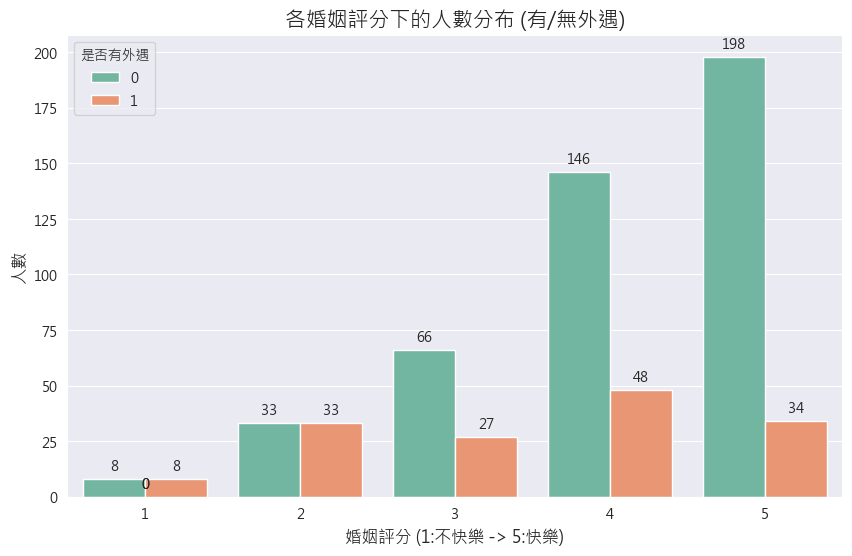

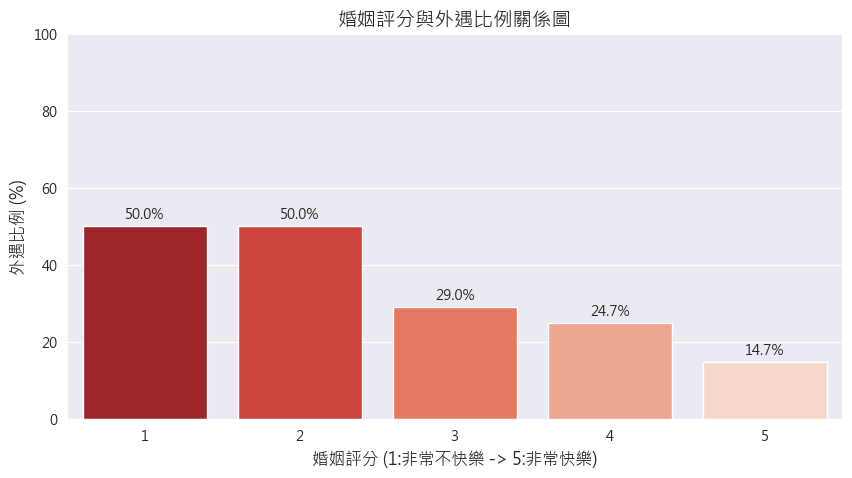

In [17]:
# 2. 繪製婚姻分數的人數統計圖
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='rating', hue='yaffairs', palette='Set2')

# 加上標題與標籤
plt.title('各婚姻評分下的人數分布 (有/無外遇)', fontsize=15)
plt.xlabel('婚姻評分 (1:不快樂 -> 5:快樂)', fontsize=12)
plt.ylabel('人數', fontsize=12)
plt.legend(title='是否有外遇')

# 在長條圖上方自動標註人數
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(data=rating_affair, x='rating', y='yaffairs', palette='Reds_r')

plt.title('婚姻評分與外遇比例關係圖', fontsize=14)
plt.xlabel('婚姻評分 (1:非常不快樂 -> 5:非常快樂)', fontsize=12)
plt.ylabel('外遇比例 (%)', fontsize=12)
plt.ylim(0, 100)
for i, val in enumerate(rating_affair['yaffairs']):
    plt.text(i, val + 2, f'{val:.1f}%', ha='center')

plt.show()

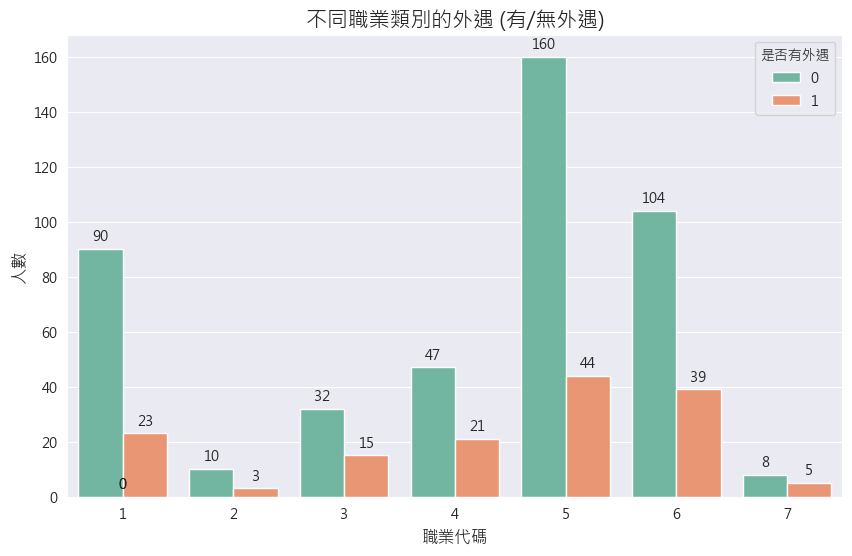

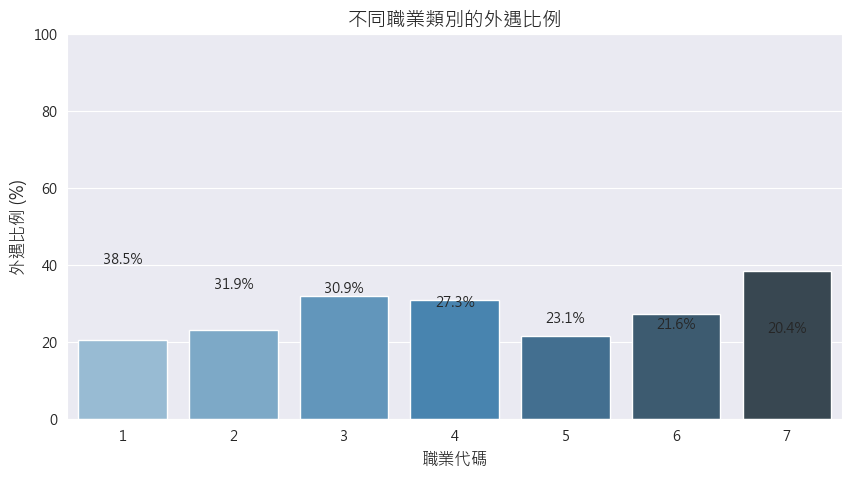

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='occupation', hue='yaffairs', palette='Set2')

# 加上標題與標籤
plt.title('不同職業類別的外遇 (有/無外遇)', fontsize=15)
plt.xlabel('職業代碼', fontsize=12)
plt.ylabel('人數', fontsize=12)
plt.legend(title='是否有外遇')

# 在長條圖上方自動標註人數
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()



plt.figure(figsize=(10, 5))
# 將職業排序以利觀察
occ_affair = occ_affair.sort_values('yaffairs', ascending=False)
sns.barplot(data=occ_affair, x='occupation', y='yaffairs', palette='Blues_d')

plt.title('不同職業類別的外遇比例', fontsize=14)
plt.xlabel('職業代碼', fontsize=12)
plt.ylabel('外遇比例 (%)', fontsize=12)
plt.ylim(0, 100)
for i, val in enumerate(occ_affair['yaffairs']):
    plt.text(i, val + 2, f'{val:.1f}%', ha='center')

plt.show()

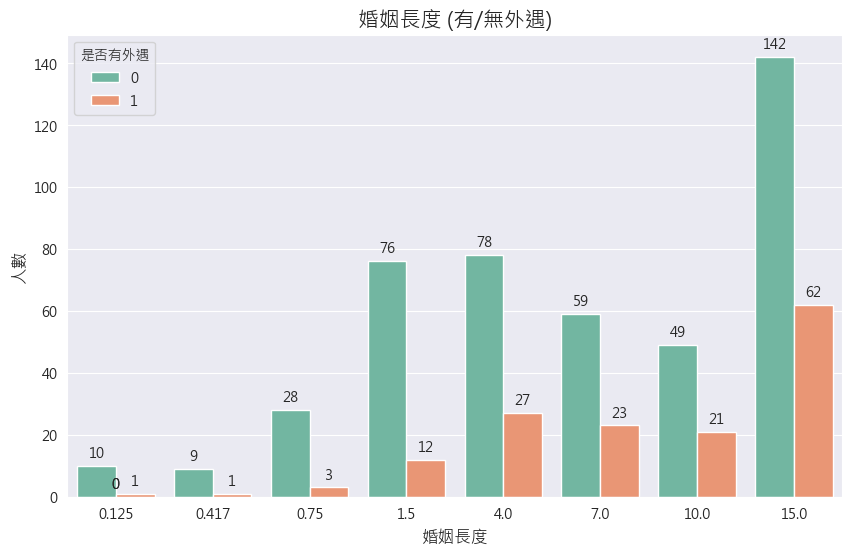

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='yearsmarried', hue='yaffairs', palette='Set2')

# 加上標題與標籤
plt.title('婚姻長度 (有/無外遇)', fontsize=15)
plt.xlabel('婚姻長度', fontsize=12)
plt.ylabel('人數', fontsize=12)
plt.legend(title='是否有外遇')

# 在長條圖上方自動標註人數
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

In [20]:
## 2-2 清整數據並轉dummy variable

In [21]:
df.head()
df.describe()

,affairs,age,yearsmarried,religiousness,education,occupation,rating,yaffairs
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780,0.249584
std,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179,0.433133
min,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,1.000000


In [22]:
total_ratio = df['yaffairs'].mean()
print(f"全體樣本的外遇比例為: {total_ratio:.2%}")

全體樣本的外遇比例為: 24.96%


In [23]:
#Remove customer IDs from the data set
# df = df.iloc[:,1:]

#Convertin the predictor variable in a binary numeric variable
df['gender'].replace(to_replace='male', value=0, inplace=True)
df['gender'].replace(to_replace='female',  value=1, inplace=True)
df['children'].replace(to_replace='no', value=0, inplace=True)
df['children'].replace(to_replace='yes',  value=1, inplace=True)
#Let's convert all the categorical variables into dummy variables
# df_dummies = pd.get_dummies(df)
# df_dummies.head()

In [24]:
pre_df = pd.get_dummies(df, columns=['occupation'], drop_first=True)


In [25]:
pre_df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,rating,yaffairs,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7
0,0,0,37.0,10.00,0,3,18,4,0,False,False,False,False,False,True
1,0,1,27.0,4.00,0,4,14,4,0,False,False,False,False,True,False
2,0,1,32.0,15.00,1,1,12,4,0,False,False,False,False,False,False
3,0,0,57.0,15.00,1,5,18,5,0,False,False,False,False,True,False
4,0,0,22.0,0.75,0,2,17,3,0,False,False,False,False,True,False


In [26]:
# We will use the data frame where we had created dummy variables
X = pre_df.drop(columns=['yaffairs', 'affairs'])
y = pre_df['yaffairs'].values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

features = X.columns  # 直接保留欄位名（不用 .values 也行）

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=features, index=X_train.index)
X_test  = pd.DataFrame(scaler.transform(X_test),     columns=features, index=X_test.index)

In [27]:
# # We will use the data frame where we had created dummy variables
# X = pre_df.drop(columns = ['yaffairs','affairs']) #x變數
# y = pre_df['yaffairs'].values #y

# # Scaling all the variables to a range of 0 to 1
# from sklearn.preprocessing import MinMaxScaler
# features = X.columns.values
# #scaler.fit(X)：準備尺規
# scaler = MinMaxScaler(feature_range = (0,1))
# scaler.fit(X_train) #找出每一欄特徵的 最大值 (Max) 和 最小值 (Min)。,為了之後能用這組最大最小值，把原始數據（例如年齡 20-80）壓縮到 0 到 1 之間。
# X = pd.DataFrame(scaler.transform(X))
# X.columns = features

In [28]:
# # Create Train & Test Data
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
# #數據量比較少 80% 數量夠多 70% (train)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(480, 13) (121, 13) (480,) (121,)


## 3-1 Logistic Regression (PPT 2.1)

In [30]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
#在宣告模型時加上 class_weight='balanced'。這會讓模型更加重視數量較少的類別。
model_log = LogisticRegression(class_weight='balanced') 
result = model_log.fit(X_train, y_train)

In [31]:
from sklearn import metrics
y_test_pred_log = model_log.predict(X_test)

print (metrics.accuracy_score(y_test, y_test_pred_log))
#正在計算模型的 「準確率」（Accuracy），也就是：「在測試集中，模型預測正確的比例是多少

0.6528925619834711


In [32]:
model_log.predict_proba(X_test)

# 對測試集 (X_test) 中的每一筆資料，計算出「不外遇」與「有外遇」的機率。

array([[0.19951451, 0.80048549],
       [0.1863652 , 0.8136348 ],
       [0.3345243 , 0.6654757 ],
       [0.39056918, 0.60943082],
       [0.53019203, 0.46980797],
       [0.77901117, 0.22098883],
       [0.62200982, 0.37799018],
       [0.48354688, 0.51645312],
       [0.40938884, 0.59061116],
       [0.62822045, 0.37177955],
       [0.74301493, 0.25698507],
       [0.55698969, 0.44301031],
       [0.72584416, 0.27415584],
       [0.69186454, 0.30813546],
       [0.20856859, 0.79143141],
       [0.29683937, 0.70316063],
       [0.66205236, 0.33794764],
       [0.28277722, 0.71722278],
       [0.47053031, 0.52946969],
       [0.26921434, 0.73078566],
       [0.68087792, 0.31912208],
       [0.72161514, 0.27838486],
       [0.56010966, 0.43989034],
       [0.49853084, 0.50146916],
       [0.63767771, 0.36232229],
       [0.5793419 , 0.4206581 ],
       [0.32043556, 0.67956444],
       [0.47436419, 0.52563581],
       [0.75167446, 0.24832554],
       [0.54916519, 0.45083481],
       [0.

In [33]:
y_test_pred_log

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

Text(0.5, 23.52222222222222, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

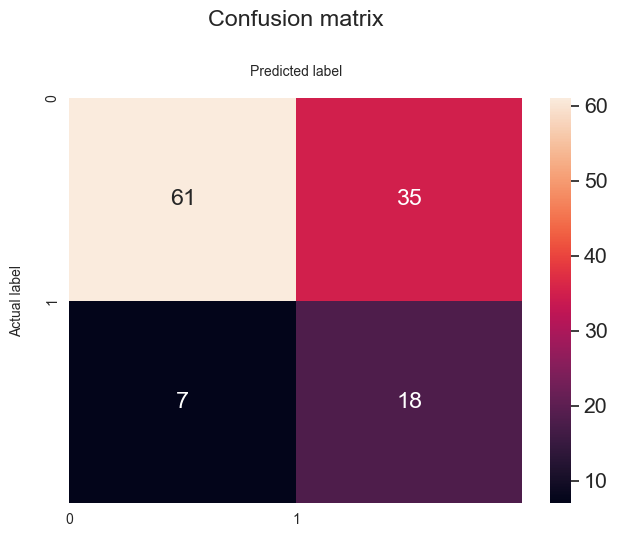

In [34]:
# Create the Confusion matrix
#作用：計算混淆矩陣。它會比對真實答案（y_test）與預測結果
cm = confusion_matrix(y_test, y_test_pred_log) 
#將 NumPy 陣列格式的 cm 轉換成 Pandas 的 DataFrame 格式。
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
#繪製熱圖 (Heatmap)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
#標註「實際值（Actual label）」與「預測值（Predicted label）」。
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [35]:
TP = 18  # 有外遇實際上也有外遇 (True Positive) 
TN = 61 # 沒有外遇實際上也沒有外遇 (True Negative)
FP = 35 # 有外遇，但實際上沒外遇 (False Positive) 誤報
FN = 7 # 沒外遇，但實際上是有外遇(False Negative)

In [36]:

 #在所有判斷中，模型「猜對」的比例（包含猜對有和猜對沒有）。 模型判斷正確的機率
print(f'Accuracy : {round((TP + TN) / (TP + FP + TN + FN), 3)}')

#模型只要說有外遇，他真的有外遇的機率有多少，模型的準確性。
print(f'Precision : {round((TP) / (TP + FP), 3)}') 

#真的有外遇的人裡面，模型抓到了多少比例。數值越高，漏抓的情況越少。
print(f'Recall/Sensitivity : {round((TP) / (TP + FN), 3)}') 

#模型正確判斷出他們沒外遇的比例。
print(f'Specificity : {round((TN) / (TN + FP), 3)}')

Accuracy : 0.653
Precision : 0.34
Recall/Sensitivity : 0.72
Specificity : 0.635


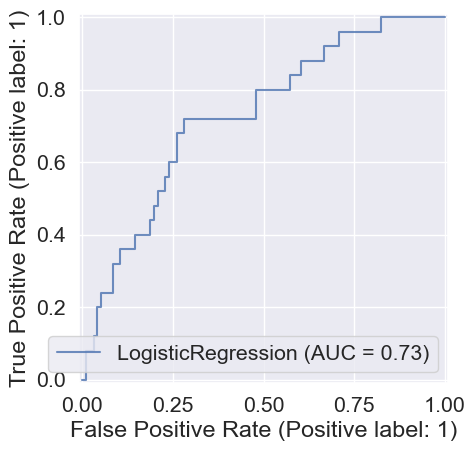

In [37]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
plt.show()
#AUC (Area Under Curve) 是曲線下的面積，數值介於 0 到 1 之間：

# 0.5： 像在猜銅板，完全沒有預測能力。

# 0.7 - 0.8： 屬於**可接受（Acceptable）**或中等水平。

# 0.8 - 0.9： 表現優秀。

# 0.9 以上： 表現極佳。

### <span style="color:#3498DB">Question: 什麼樣的因素與有外遇呈現明顯的正向影響與負向影響 </span>

Axes(0.125,0.11;0.775x0.77)


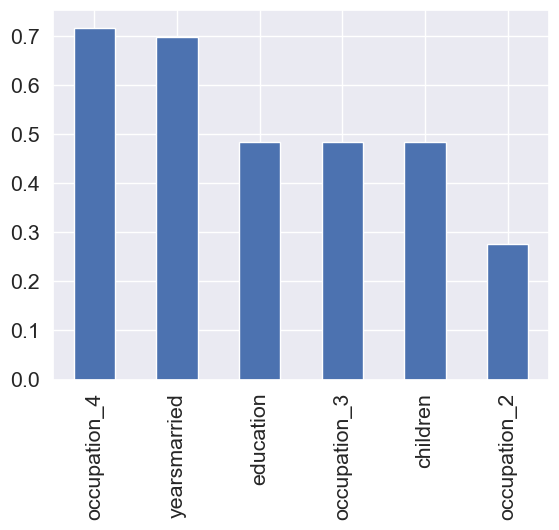

In [38]:
# To get the weights of all the variables
weights = pd.Series(model_log.coef_[0], index=X.columns.values)
positive_weights = weights[weights > 0].sort_values(ascending=False)
print(positive_weights.plot(kind='bar'))

In [41]:
model_log.coef_.shape
# coef_ 的形狀固定為 (n_classes, n_features)：

# n_classes：類別的數量。

# n_features：特徵（自變數）的數量。

(1, 13)

Axes(0.125,0.11;0.775x0.77)


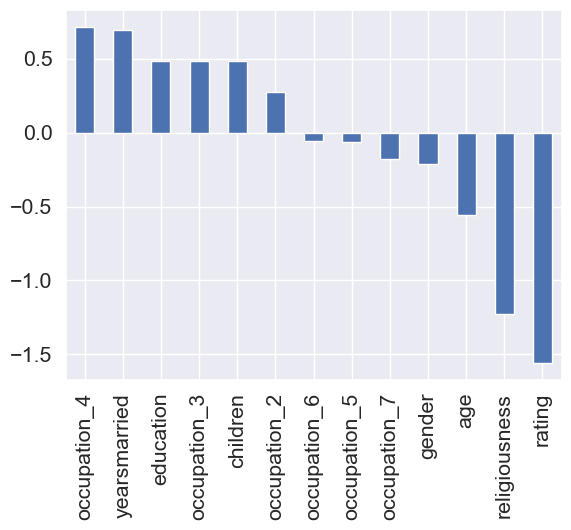

In [39]:
weights = pd.Series(model_log.coef_[0], index=X.columns.values)
native_weights = weights.sort_values(ascending=False)
print(native_weights.plot(kind='bar'))

In [42]:
# To get the weights of all the variables
weights = pd.Series(abs(model_log.coef_[0]), index=X.columns.values)
weights.sort_values(ascending = False)[:15]

rating           1.556978
religiousness    1.227402
occupation_4     0.717542
yearsmarried     0.698589
age              0.557936
education        0.484327
occupation_3     0.483739
children         0.483682
occupation_2     0.276535
gender           0.209723
occupation_7     0.178756
occupation_5     0.062436
occupation_6     0.058720
dtype: float64

## 3-2 Support Vecor Machine (SVM) (PPT 2.2)

In [43]:
#svm: 二元分類器、小樣本、非線性、高維度(多x)、局部最小點等問題具有優勢

In [ ]:
from sklearn.svm import SVC
#x-y表示兩個樣本之間得距離 x,y相似是1
model_svm = SVC(kernel='rbf') 
model_svm.fit(X_train,y_train)
y_test_pred_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_svm)
#邏輯式回歸的accuracy:0.6528925619834711

0.7768595041322314

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

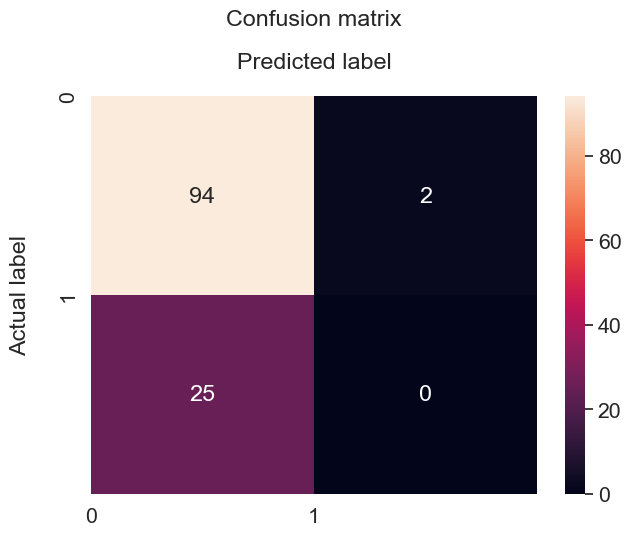

In [ ]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_svm) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

#召回率 (Recall) 是 0，資料不平衡

In [44]:
TP = 0
FP = 2 
FN=25
TN=94
# TP=180, FP=94, FN=175, TN=958

print(f'Accuracy : {round((TP+TN)/(TN+FN+TP+FP),3)}')    # (TP + TN) / (TP + FP + TN + FN) 
print(f'Precision : {round((TP/(TP+FP)), 3)}')              # TP / (TP + FP)
print(f'Recall/Sensitivity : {round((TP)/(TP+FN), 3)}')     # TP / (TP + FN)
print(f'Specificity : {round((TN)/(TN+FP), 3)}')            # TN / (TN + FP)

Accuracy : 0.777
Precision : 0.0
Recall/Sensitivity : 0.0
Specificity : 0.979


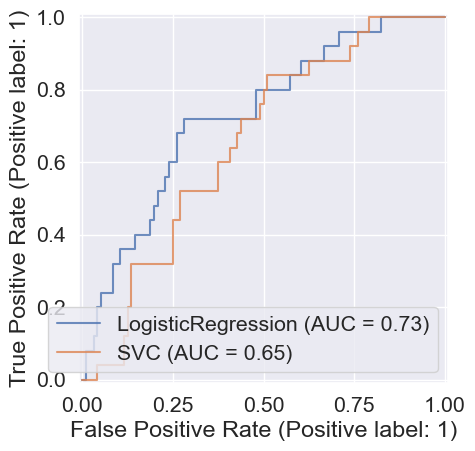

In [43]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
svm_disp = RocCurveDisplay.from_estimator(model_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

preprocessor = make_pipeline(SelectKBest(f_classif, k=10))  # 僅保留好的K個變數
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0)) #random_state固定預測結果

In [50]:
SVM.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'pipeline', 'standardscaler', 'svc', 'pipeline__memory', 'pipeline__steps', 'pipeline__transform_input', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [62]:
hyper_params_svm = {'svc__gamma':[0.001, 0.0001,0.0003, 0.0005,0.00025], 'svc__C':[1, 5,10, 100, 1000, 3000,5000,8000],}# 'svc__C': 越大代表容錯率越小  gamma越大模型越複雜

In [63]:
grid_svm = GridSearchCV(SVM, hyper_params_svm,scoring='recall', cv=3) # GridSearchCV:網格搜索, cv:交叉驗證
grid_svm.fit(X_train, y_train) 

print(grid_svm.best_params_)

{'svc__C': 8000, 'svc__gamma': 0.001}


In [64]:
y_test_pred_gridsvm = grid_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_gridsvm)

0.7768595041322314

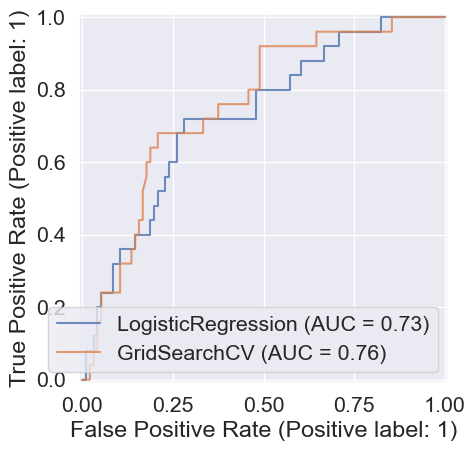

In [65]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_svm_disp = RocCurveDisplay.from_estimator(grid_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## 3-3  Decision Tree (PPT 2.3)

In [66]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = 'gini')  # CART, 默認為gini
clf = model_dt.fit(X_train, y_train)

# Make predictions
y_test_pred_dt = model_dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_dt))

0.6859504132231405


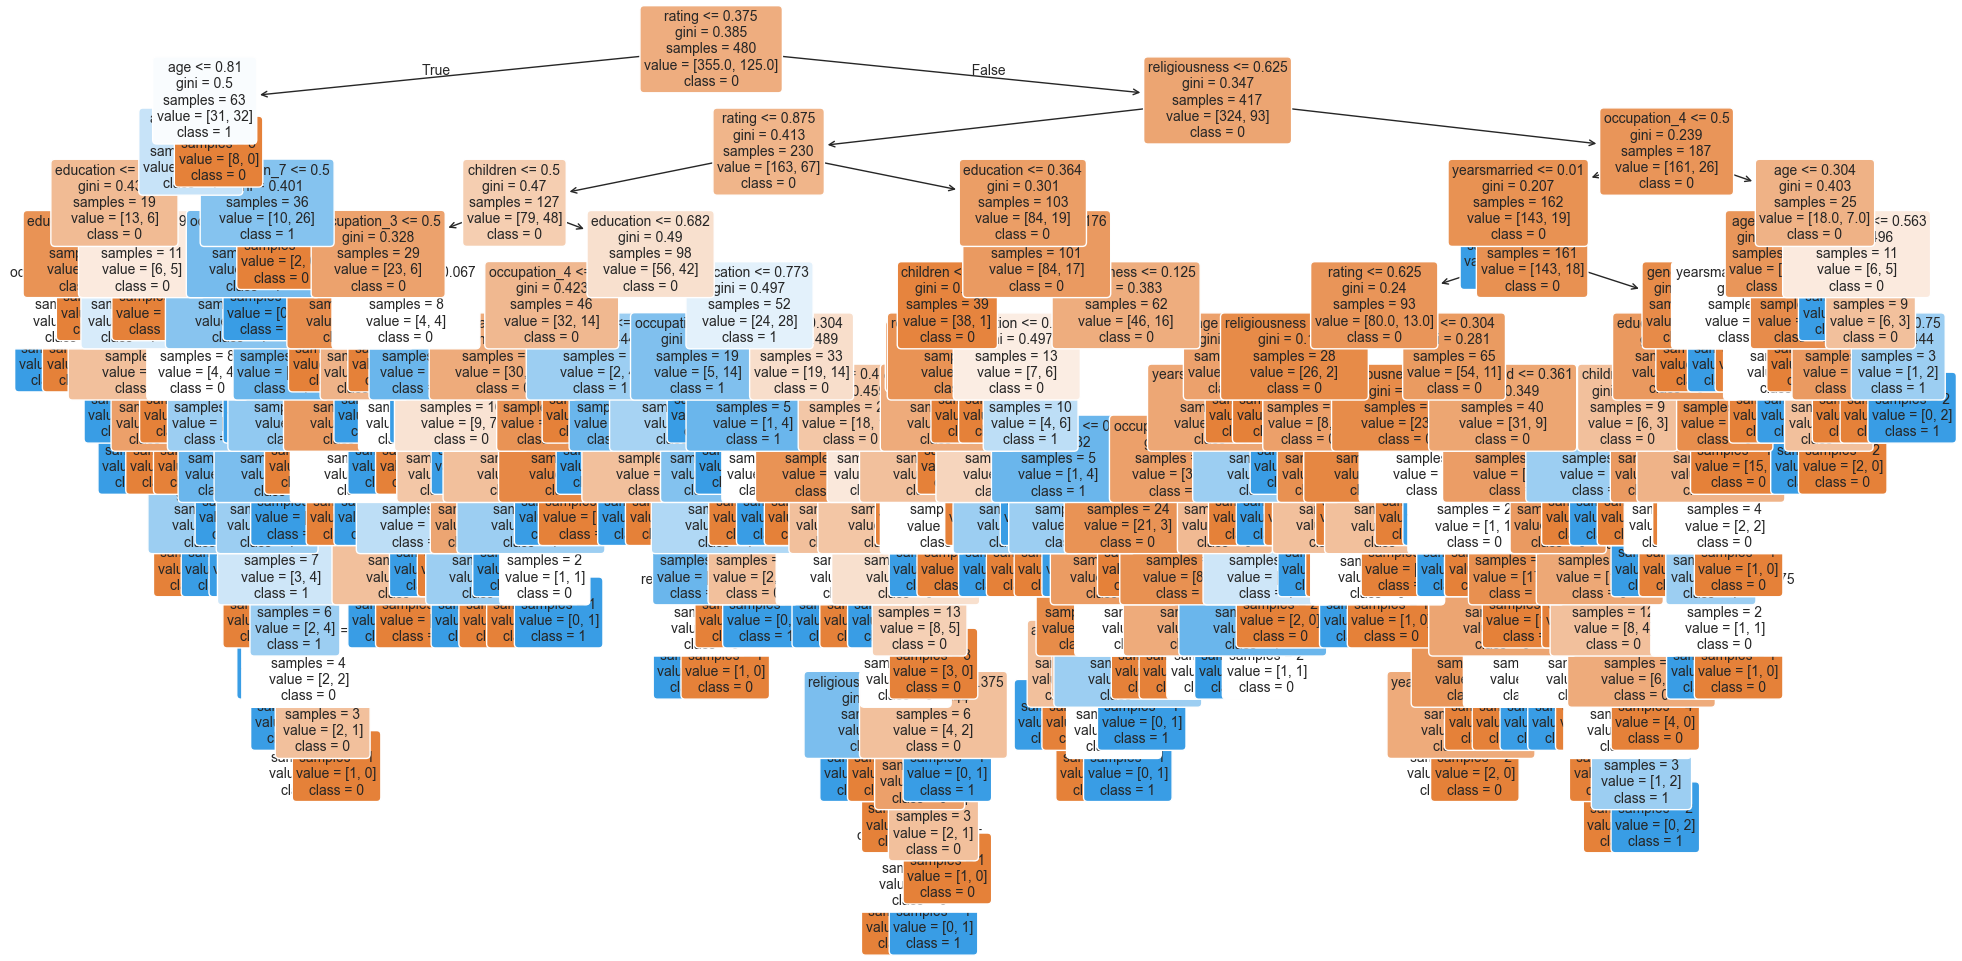

In [67]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model_dt,
    feature_names=X_train.columns,   # 如果 X_train 是 DataFrame
    class_names=[str(c) for c in model_dt.classes_],  # 類別名稱
    filled=True,       # 顏色填滿，直觀
    rounded=True,      # 圓角
    impurity=True,     # 顯示 gini
    proportion=False,  # 顯示樣本數量
    fontsize=10
)
plt.tight_layout()
plt.show()

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

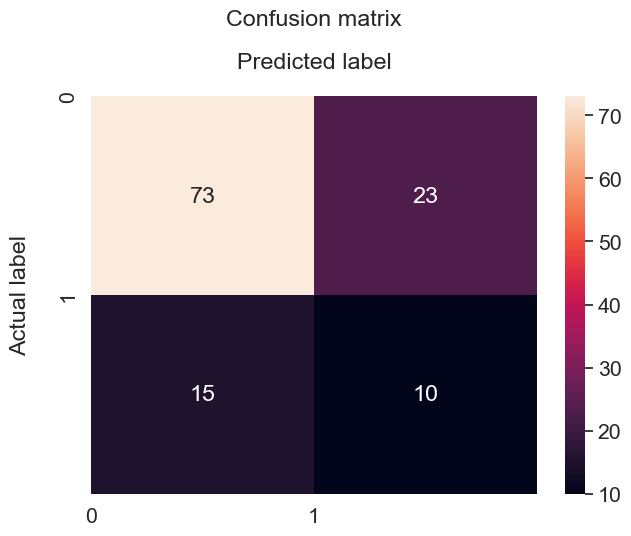

In [68]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_dt) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [69]:
TP = 73
FP = 23
FN=15
TN=10
# TP=180, FP=94, FN=175, TN=958

print(f'Accuracy : {round((TP+TN)/(TN+FN+TP+FP),3)}')    # (TP + TN) / (TP + FP + TN + FN) 
print(f'Precision : {round((TP/(TP+FP)), 3)}')              # TP / (TP + FP)
print(f'Recall/Sensitivity : {round((TP)/(TP+FN), 3)}')     # TP / (TP + FN)
print(f'Specificity : {round((TN)/(TN+FP), 3)}')            # TN / (TN + FP)

Accuracy : 0.686
Precision : 0.76
Recall/Sensitivity : 0.83
Specificity : 0.303


In [70]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=10)) # 挑選出K個分數最高的特徵
DecisionTree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))

In [71]:
DecisionTree.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'pipeline', 'decisiontreeclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__transform_input', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__monotonic_cst', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [87]:
hyper_params_dt = {
    'decisiontreeclassifier__max_leaf_nodes':[10,20,30,40, 50],    # 最多有多少個leaf nodes
    'decisiontreeclassifier__min_samples_leaf': [5,10,15],  # 要成為leaf nodes，最少需要多少資料
    'decisiontreeclassifier__max_depth': [5,10,15]          # 限制樹的高度最多幾層
}

In [100]:
grid_dt = GridSearchCV(DecisionTree, hyper_params_dt, scoring='recall', cv=10) 
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)

{'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_leaf_nodes': 40, 'decisiontreeclassifier__min_samples_leaf': 5}


In [101]:
y_test_pred_griddt = grid_dt.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_griddt)
metrics.recall_score(y_test,y_test_pred_griddt)

0.24

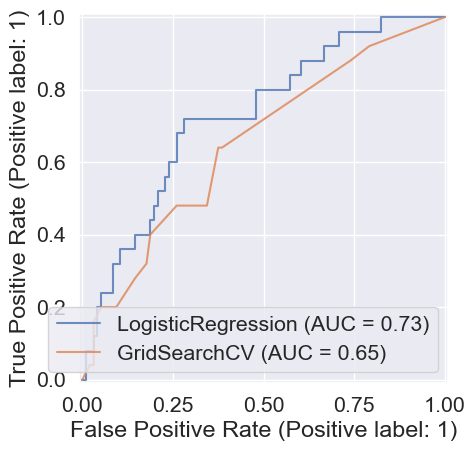

In [83]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_dt_disp = RocCurveDisplay.from_estimator(grid_dt, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [61]:
print(tree.export_text(model_dt, feature_names=list(X_train.columns)))

|--- rating <= 0.38
|   |--- age <= 0.81
|   |   |--- age <= 0.30
|   |   |   |--- education <= 0.68
|   |   |   |   |--- religiousness <= 0.62
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- religiousness >  0.62
|   |   |   |   |   |--- occupation_3 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- occupation_3 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- education >  0.68
|   |   |   |   |--- education <= 0.91
|   |   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- gender >  0.50
|   |   |   |   |   |   |--- age <= 0.18
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- age >  0.18
|   |   |   |   |   |   |   |--- religiousness <= 0.12
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- religiousness >  0.12
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- education >  0.91
|   |   |   |   |   |--- class: 0
|   |   |--- age >  

## 3-4 Random Forest (PPT 2.4)

In [102]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions
y_test_pred_rf = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_rf))

0.71900826446281


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

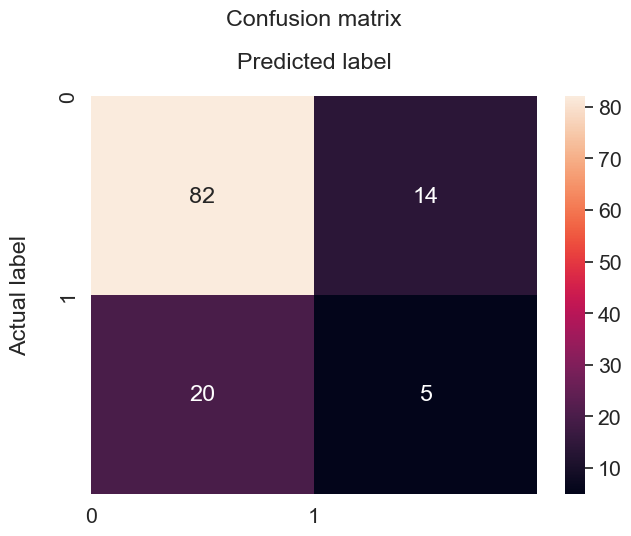

In [103]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_rf) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [104]:
TP = 5
FP = 14
FN=20
TN=82
# TP=180, FP=94, FN=175, TN=958

print(f'Accuracy : {round((TP+TN)/(TN+FN+TP+FP),3)}')    # (TP + TN) / (TP + FP + TN + FN) 
print(f'Precision : {round((TP/(TP+FP)), 3)}')              # TP / (TP + FP)
print(f'Recall/Sensitivity : {round((TP)/(TP+FN), 3)}')     # TP / (TP + FN)
print(f'Specificity : {round((TN)/(TN+FP), 3)}')            # TN / (TN + FP)

Accuracy : 0.719
Precision : 0.263
Recall/Sensitivity : 0.2
Specificity : 0.854


In [105]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=10))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))

In [106]:
RandomForest.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'pipeline', 'randomforestclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__transform_input', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__monotonic_cst', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose

In [107]:
hyper_params_rf = {"randomforestclassifier__n_estimators":[10,50,100,150,200],
                   "randomforestclassifier__max_depth":[5,10,15,20], 
                   "randomforestclassifier__max_leaf_nodes":[10,20,30]}

In [108]:
grid_rf = GridSearchCV(RandomForest, hyper_params_rf, scoring='recall', cv=3)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)

{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_leaf_nodes': 30, 'randomforestclassifier__n_estimators': 10}


In [109]:
y_test_pred_gridrf = grid_rf.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_gridrf)

0.768595041322314

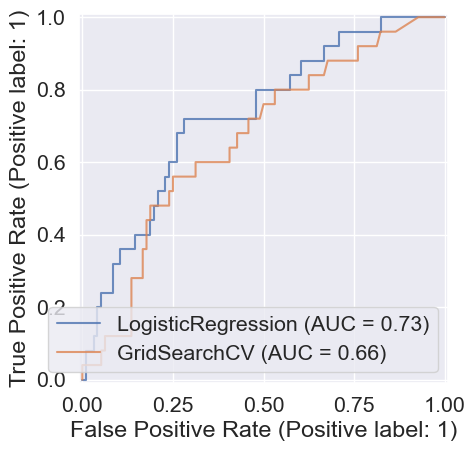

In [110]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_rf_disp = RocCurveDisplay.from_estimator(grid_rf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## 3.5 XgBoost (PPT.5)

In [111]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
y_test_pred_xg = model_xg.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_xg)

0.7603305785123967

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

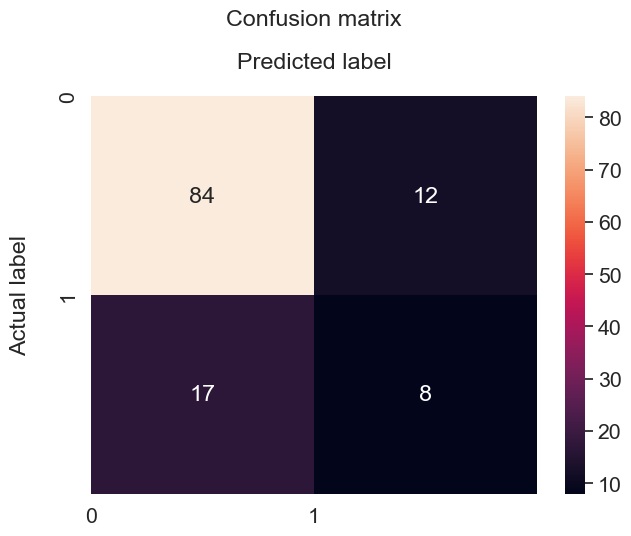

In [112]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_xg) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [113]:
TP = 8
FP = 12
FN=17
TN=84
# TP=180, FP=94, FN=175, TN=958

print(f'Accuracy : {round((TP+TN)/(TN+FN+TP+FP),3)}')    # (TP + TN) / (TP + FP + TN + FN) 
print(f'Precision : {round((TP/(TP+FP)), 3)}')              # TP / (TP + FP)
print(f'Recall/Sensitivity : {round((TP)/(TP+FN), 3)}')     # TP / (TP + FN)
print(f'Specificity : {round((TN)/(TN+FP), 3)}')            # TN / (TN + FP)

Accuracy : 0.76
Precision : 0.4
Recall/Sensitivity : 0.32
Specificity : 0.875


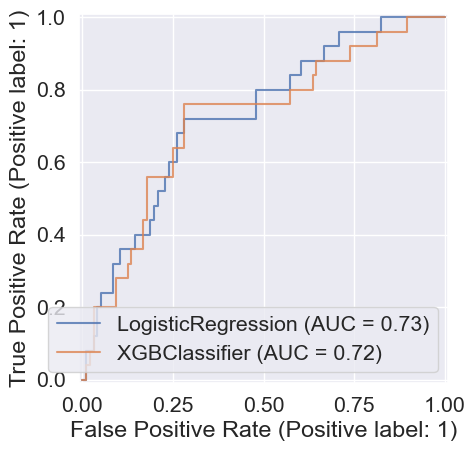

In [114]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
model_xg_disp = RocCurveDisplay.from_estimator(model_xg, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [121]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [1, 3]  
} #scale_pos_weight 調整權重

grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring='recall', cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 3, 'subsample': 1.0}
Best accuracy: 0.5911730545876888


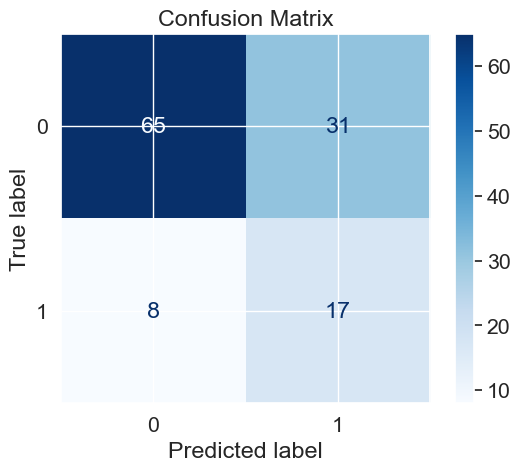

In [122]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 取得最佳模型
best_model = grid_search.best_estimator_

# 測試集預測
y_pred = best_model.predict(X_test)

# 混淆矩陣
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [124]:
TP=65; FP=8; FN=31; TN=17

print(f'Accuracy : {round((TP + TN) / (TP + FP + TN + FN),3)}') 
print(f'Precision : {round(TP / (TP + FP), 3)}')                  
print(f'Recall/Sensitivity : {round(TP / (TP + FN), 3)}')       
print(f'Specificity : {round(TN / (TN + FP), 3)}')

Accuracy : 0.678
Precision : 0.89
Recall/Sensitivity : 0.677
Specificity : 0.68


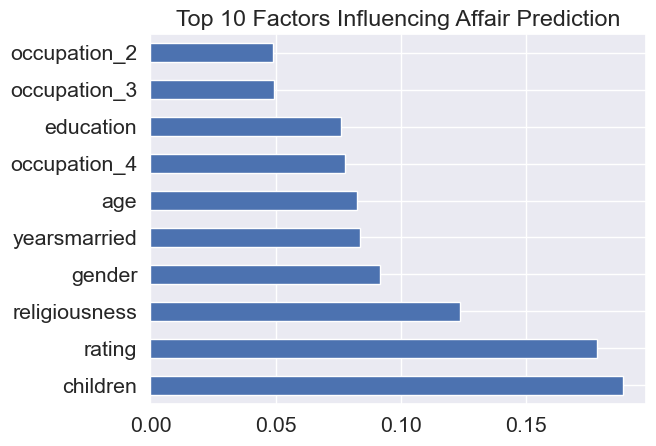

In [123]:
# 獲取特徵重要性
import pandas as pd
import matplotlib.pyplot as plt

# 假設你的最佳模型是 best_xgb
best_xgb = grid_search.best_estimator_
feat_importances = pd.Series(best_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Factors Influencing Affair Prediction")
plt.show()